#### Healthcare Data Analysis
The goal of this project is to analyze synthetic healthcare data based on medical heuristics to ensure realistic correlations between features to predict heart disease risk.
Dataset:https://www.kaggle.com/datasets/bertnardomariouskono/cardiovascular-disease-risk-prediction-dataset

In [ ]:
# import packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("./healthcare_synthetic_data.csv")

In [35]:
df.head()

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Systolic_BP,Diastolic_BP,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL,Fasting_Blood_Sugar,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Family_History,Stress_Level,Sleep_Hours,Heart_Disease_Risk
0,PID-00001,60,0,146.9,51.3,23.8,140,89,217,151,52,83,0,1,3,0,1,8,0
1,PID-00002,53,0,161.8,76.6,29.3,128,81,203,119,38,116,0,0,1,0,7,9,0
2,PID-00003,62,1,174.7,92.4,30.3,141,100,173,124,45,90,0,0,0,0,1,7,1
3,PID-00004,73,1,173.3,68.9,22.9,136,96,193,117,45,81,0,0,1,0,2,7,1
4,PID-00005,52,1,178.6,79.8,25.0,122,80,236,153,41,79,0,1,2,0,2,6,0


In [36]:
df.info() #describe data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               15000 non-null  object 
 1   Age                      15000 non-null  int64  
 2   Gender                   15000 non-null  int64  
 3   Height_cm                15000 non-null  float64
 4   Weight_kg                15000 non-null  float64
 5   BMI                      15000 non-null  float64
 6   Systolic_BP              15000 non-null  int64  
 7   Diastolic_BP             15000 non-null  int64  
 8   Cholesterol_Total        15000 non-null  int64  
 9   Cholesterol_LDL          15000 non-null  int64  
 10  Cholesterol_HDL          15000 non-null  int64  
 11  Fasting_Blood_Sugar      15000 non-null  int64  
 12  Smoking_Status           15000 non-null  int64  
 13  Alcohol_Consumption      15000 non-null  int64  
 14  Physical_Activity_Leve

In [4]:
# Fill na with 0 for all numerical columns
numeric_dtypes = ['int64', 'float64']
numerics = []
for col in df.columns:
    if df[col].dtype in numeric_dtypes:
        numerics.append(col)

df.update(df[numerics].fillna(0))

In [4]:
df.isna().sum().sort_values(ascending=False)

Patient_ID                 0
Age                        0
Gender                     0
Height_cm                  0
Weight_kg                  0
BMI                        0
Systolic_BP                0
Diastolic_BP               0
Cholesterol_Total          0
Cholesterol_LDL            0
Cholesterol_HDL            0
Fasting_Blood_Sugar        0
Smoking_Status             0
Alcohol_Consumption        0
Physical_Activity_Level    0
Family_History             0
Stress_Level               0
Sleep_Hours                0
Heart_Disease_Risk         0
dtype: int64

View each feature's Spearman correlation with heart disease risk

In [ ]:
features = list(df.columns) # a list of column names
features.remove('Heart_Disease_Risk')
features.remove('Patient_ID')
features

['Age',
 'Gender',
 'Height_cm',
 'Weight_kg',
 'BMI',
 'Systolic_BP',
 'Diastolic_BP',
 'Cholesterol_Total',
 'Cholesterol_LDL',
 'Cholesterol_HDL',
 'Fasting_Blood_Sugar',
 'Smoking_Status',
 'Alcohol_Consumption',
 'Physical_Activity_Level',
 'Family_History',
 'Stress_Level',
 'Sleep_Hours']

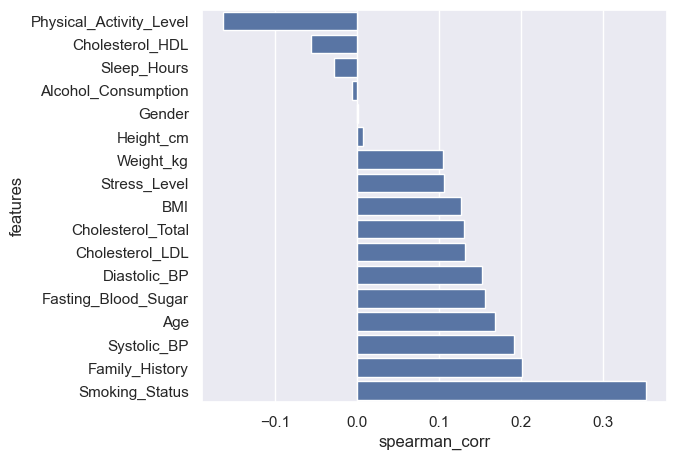

In [39]:
# Spearman correlation is better to work with in this case because it picks up 
# relationships between variables even when they are nonlinear.
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['features'] = features
    spr['spearman_corr'] = [frame[f].corr(frame['Heart_Disease_Risk'], 'spearman') for f in features]
    spr = spr.sort_values('spearman_corr')
    plt.figure(figsize=(6, 0.3*len(features)))
    sns.barplot(data=spr, y='features', x='spearman_corr', orient='h')
    
spearman(df, features)    

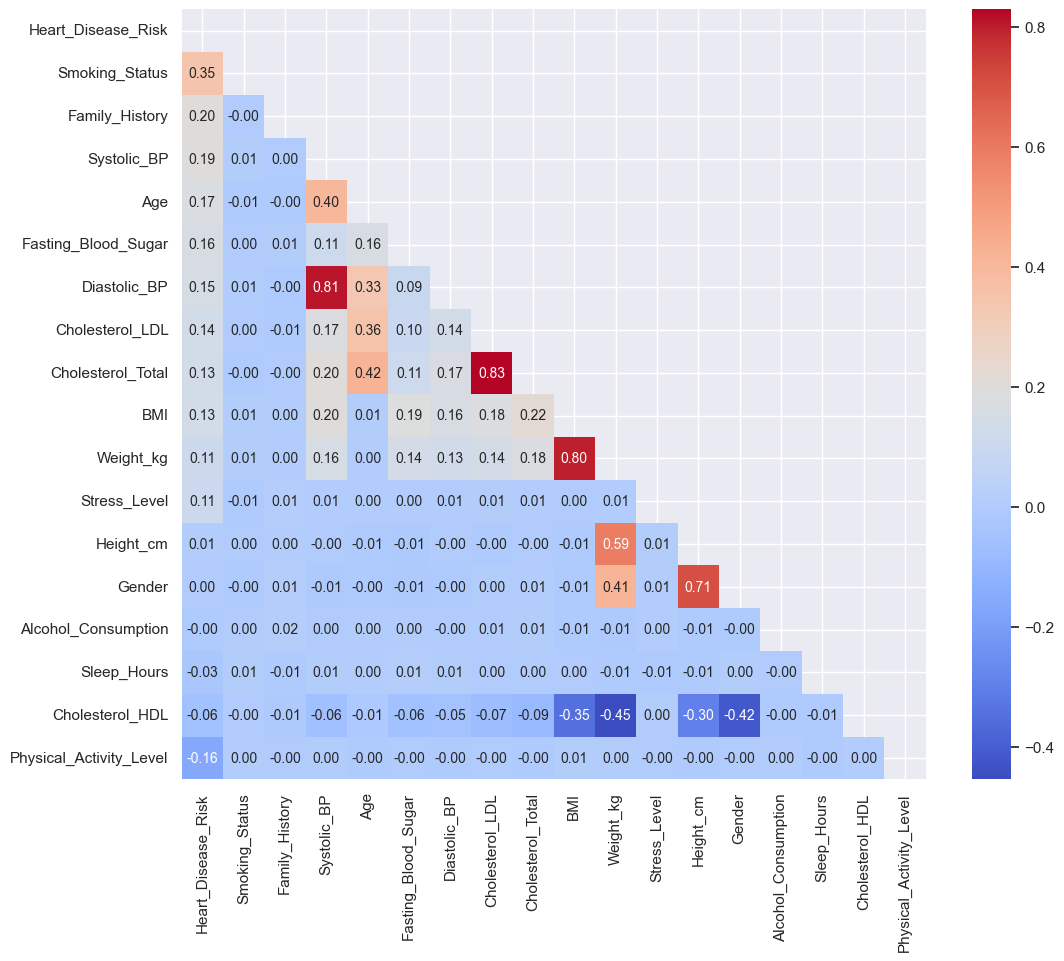

In [ ]:
import numpy as np
df_num = df.copy()
df_num.pop('Patient_ID')  # exclude ID
plt.figure(figsize=(12,10))

corr = df_num.corr()
cols = corr.nlargest(18, 'Heart_Disease_Risk')['Heart_Disease_Risk'].index  #Consider all columns here
cm = np.corrcoef(df_num[cols].values.T)  # Pearson's correlation coefficients.

mask = np.triu(np.ones_like(cm, dtype=bool))
hm = sns.heatmap(cm, cbar=True, annot=True, mask=mask, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()
# Note: df.corr() is NaN tolerant whereas np.corrcoef is not
# Pearson's correlation coefficient is a measure of strength of linear relationship between 
# the variable. So, it may provide false results for non-linear relationship.

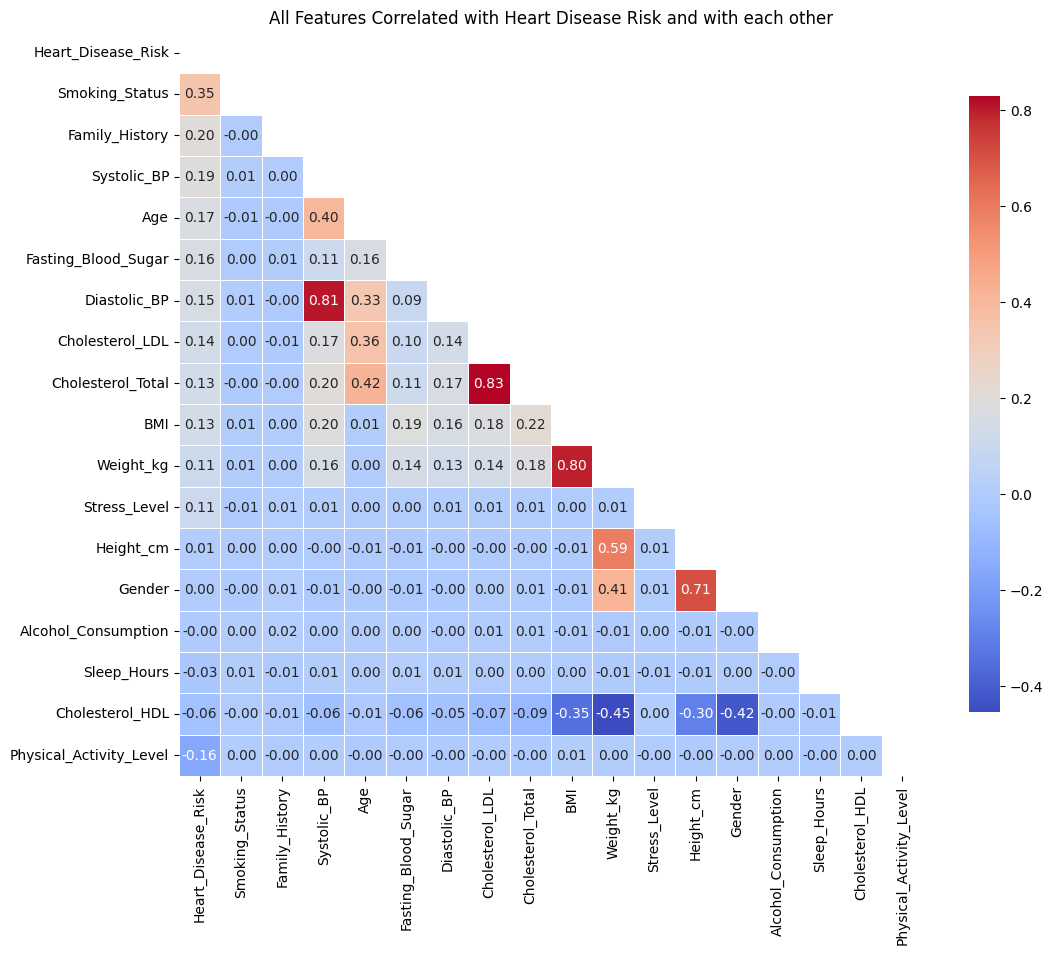

In [29]:
# Improved version
import numpy as np
df_num = df.copy()
df_num.pop('Patient_ID')  # exclude ID

plt.figure(figsize=(12, 10))

# Get the correlation matrix
corr_matrix = df_num.corr()  # Spearman's correlation matrix
#print(corr_matrix)

# Focus on Heart_Disease_Risk correlations
cols = corr_matrix['Heart_Disease_Risk'].sort_values(ascending=False).index
cm = df_num[cols].corr()  # No need for Pearson's correlation coefficients. (np.corrcoef() in above cell)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(cm, dtype=bool))

sns.heatmap(cm, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            square=True, 
            linewidths=.5,
            cbar_kws={"shrink": .8})

plt.title('All Features Correlated with Heart Disease Risk and with each other')
plt.show()

Explore some insights intrigue in above figure:

In [45]:
gen_hdl = df.groupby(['Gender'])['Cholesterol_HDL'].mean()
gen_hdl

Gender
0    45.757938
1    40.776769
Name: Cholesterol_HDL, dtype: float64

<Figure size 800x600 with 0 Axes>

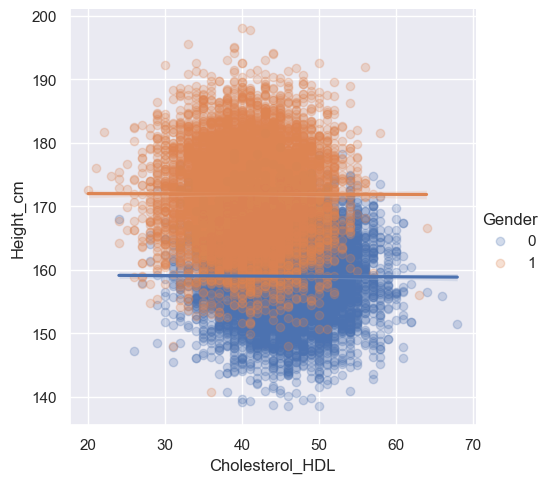

In [ ]:
plt.figure(figsize=(8, 6)) 
sns.lmplot(data=df[['Cholesterol_HDL', 'Height_cm', 'Gender']], x='Cholesterol_HDL', y='Height_cm',
                hue='Gender', scatter_kws={"alpha": 0.25})

#### Gender vs. cholesterol_HDL
It's generally true that adult females, especially premenopausal women, tend to have higher High-Density Lipoprotein (HDL) cholesterol levels than males, with female hormones like estrogen boosting these levels, offering better heart protection, though this difference narrows after menopause. Health guidelines reflect this, recommending higher HDL for women (around 50 mg/dL+) for heart health compared to men (around 40 mg/dL+).   
Ref. https://www.webmd.com/cholesterol-management/good-cholesterol-too-high

#### BMI factor
Prepare data for two sample t-test on BMI values

In [ ]:
# Get a specific group's data using get_group()
bmi_risk0 = df.groupby("Heart_Disease_Risk").get_group(0)["BMI"]
bmi_risk0.__len__ #8460


<bound method Series.__len__ of 0        23.8
1        29.3
4        25.0
5        23.7
6        25.0
         ... 
14987    40.9
14988    29.2
14989    27.8
14992    29.3
14993    30.9
Name: BMI, Length: 8460, dtype: float64>

In [ ]:
bmi_risk1 = df.groupby("Heart_Disease_Risk").get_group(1)["BMI"]
bmi_risk1.__len__ # 6540

<bound method Series.__len__ of 2        30.3
3        22.9
8        28.2
10       33.9
13       32.3
         ... 
14995    29.4
14996    26.0
14997    27.8
14998    24.5
14999    25.1
Name: BMI, Length: 6540, dtype: float64>

The t-test result suggests that BMI values are significantly different between the low and high risk groups. 

In [ ]:
# https://www.thedataschool.co.uk/miles-cumiskey/basic-statistical-tests-in-python/
# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(bmi_risk0, bmi_risk1)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -16.371801492783764
p-value: 1.0018398344693138e-59


What's the average risk among BMI groups, from overweight, normal to overweight?  

In [20]:
bins = [0, 18.5, 24.9, 29.9, 40]
labels = ['underweight', 'normal', 'overweight', 'obesity']
df['BMI_group'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=True)

bmi_risk = df.groupby('BMI_group', observed=True)['Heart_Disease_Risk'].mean()*100
bmi_risk

BMI_group
underweight    29.629630
normal         36.654888
overweight     43.519463
obesity        51.391863
Name: Heart_Disease_Risk, dtype: float64

The graph indicates that the higher the BMI value, the higher the heart disease risk.

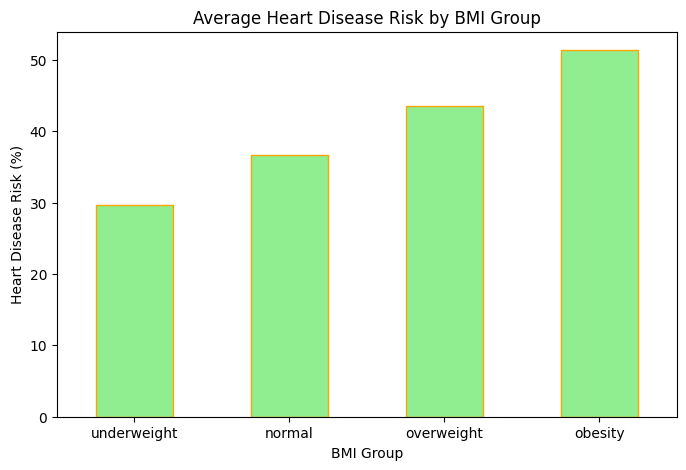

In [19]:
plt.figure(figsize=(8,5))
bmi_risk.plot(kind='bar', color='lightgreen', edgecolor='orange', title='Average Heart Disease Risk by BMI Group')
plt.xlabel("BMI Group")
plt.ylabel("Heart Disease Risk (%)")
plt.xticks(rotation=0)
plt.show()

#### Age factor
Average high risk counts over different age groups 

In [3]:
bins = [20,30,40,50,60,70,80,90]
labels = ['21-30','31-40','41-50','51-60','61-70','71-80','81-90'] 
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

age_risk = df.groupby("Age_group", observed=True)['Heart_Disease_Risk'].mean()*100
age_risk

Age_group
21-30    26.086957
31-40    30.572809
41-50    36.833646
51-60    44.693542
61-70    51.381559
71-80    57.192076
81-90    61.135371
Name: Heart_Disease_Risk, dtype: float64

The plot shows a clear trend of increasing heart disease risk along with age progress.

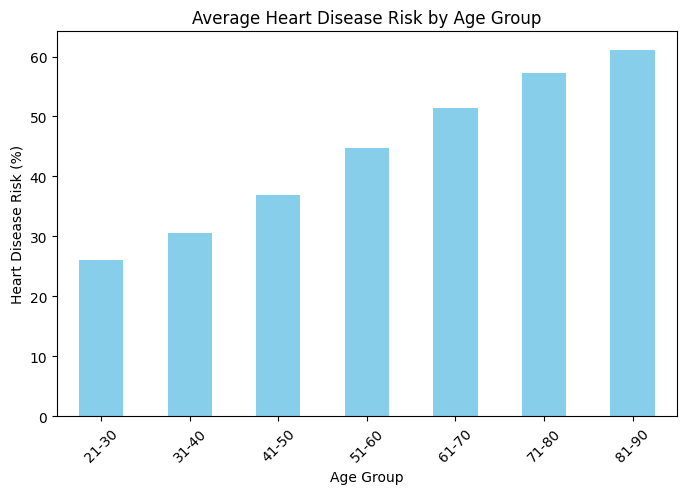

In [13]:
plt.figure(figsize=(8,5))
age_risk.plot(kind='bar', color='skyblue', title='Average Heart Disease Risk by Age Group')
plt.xlabel("Age Group")
plt.ylabel("Heart Disease Risk (%)")
plt.xticks(rotation=45)
plt.show()

#### Cholesterol levels vs. Age
Inspect Cholesterol variating among age groups

In [5]:
age_chol = df.groupby("Age_group", observed=True)[["Cholesterol_Total", "Cholesterol_LDL","Cholesterol_HDL"]].mean()
age_chol

,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL
Age_group,,,
21-30,195.324638,126.142029,43.284058
31-40,201.378882,130.287095,43.469979
41-50,209.242700,135.772569,43.458880
51-60,216.954134,140.926573,43.204854
61-70,224.918348,145.987581,43.316982
71-80,231.980189,150.768303,43.153316
81-90,239.344978,156.034934,42.698690


The figure below shows a trend of increasing LDL (bad cholesterol) level as age progress, while HDL level remain constant through the age groups.

<Figure size 1000x600 with 0 Axes>

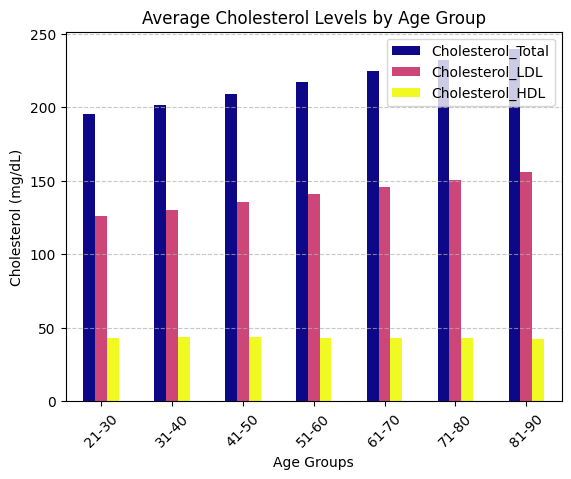

In [ ]:
plt.figure(figsize=(12,6))
age_chol.plot(kind='bar', colormap='plasma', title='Average Cholesterol Levels by Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Cholesterol (mg/dL)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

As refer to: https://www.snodlandsurgery.org.uk/bp-calculator  
Low: Systolic Blood Pressure: 70 - 90 / Diastolic Blood Pressure: 40 - 60  
Normal: Systolic Blood Pressure: 90 - 120 / Diastolic Blood Pressure: 60 - 80  
Pre Hypertension: Systolic Blood Pressure: 120 - 140 / Diastolic Blood Pressure: 80 - 90  
High: Stage 1 Hypertension: Systolic Blood Pressure: 140 - 160 / Diastolic Blood Pressure: 90 - 100  
High: Stage 2 Hypertension: Systolic Blood Pressure: 160 - 190+ / Diastolic Blood Pressure: 100 - 120+

In [5]:
import numpy as np

# Define bins and labels for Systolic BP, Diastolic BP
bins_Sys = [70, 89, 120, 140, 160, 190]
bins_Dias = [40, 59, 80, 90, 100, 120]
labels_Sys = ['Sys Low', 'Sys Normal', 'Sys PreHyper', 'Sys High S1', 'Sys High S2']
labels_Dias = ['Dias Low', 'Dias Normal', 'Dias PreHyper', 'Dias High S1', 'Dias High S2']

# Create new columns with the range categories using pd.cut
df['SysBP_group'] = pd.cut(df['Systolic_BP'], bins=bins_Sys, labels=labels_Sys)
df['DiasBP_group'] = pd.cut(df['Diastolic_BP'], bins=bins_Dias, labels=labels_Dias)

# Group by both new range columns and aggregate the 'Heart_Disease_Risk' column
bp_risk = df.groupby(['SysBP_group', 'DiasBP_group'], observed=True)['Heart_Disease_Risk'].mean()*100
bp_risk

SysBP_group   DiasBP_group 
Sys Normal    Dias Normal      25.764192
              Dias PreHyper    27.766990
              Dias High S1     26.666667
Sys PreHyper  Dias Normal      33.333333
              Dias PreHyper    39.839289
              Dias High S1     43.483913
              Dias High S2     43.023256
Sys High S1   Dias Normal      50.000000
              Dias PreHyper    50.000000
              Dias High S1     53.135690
              Dias High S2     56.233062
Sys High S2   Dias High S1     63.157895
              Dias High S2     71.428571
Name: Heart_Disease_Risk, dtype: float64

The plot shows as systolic BP and diastolic BP increase, heart disease risk increases steadily.  
It's important to keep normal blood pressure. 

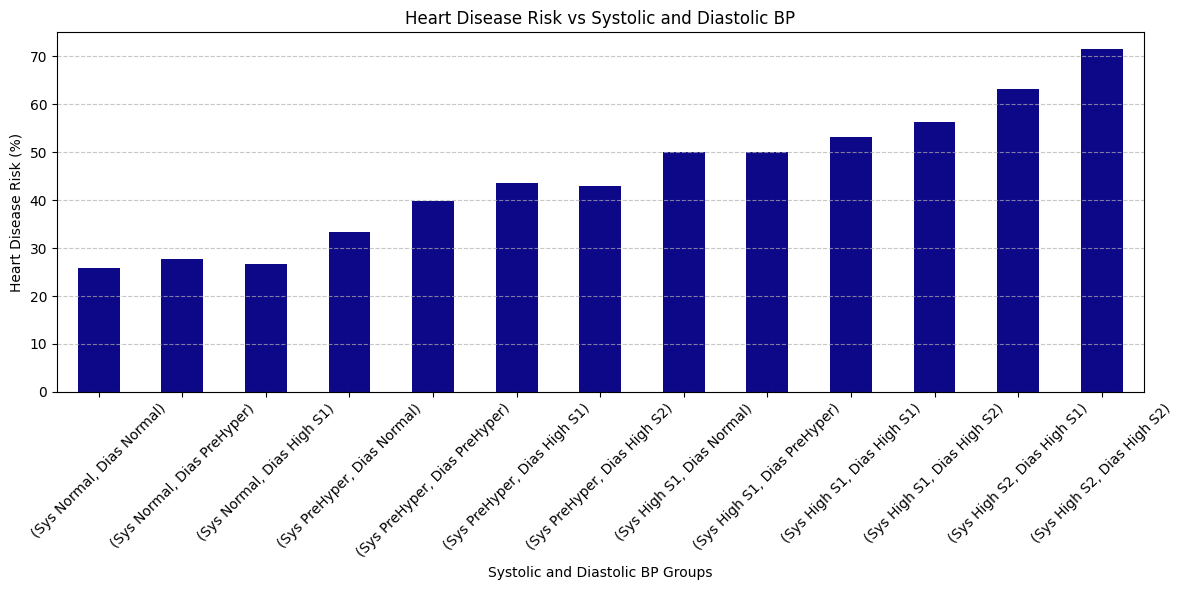

In [8]:
plt.figure(figsize=(12,6))
bp_risk.plot(kind='bar', colormap='plasma', title='Heart Disease Risk vs Systolic and Diastolic BP')
plt.xlabel('Systolic and Diastolic BP Groups')
plt.ylabel('Heart Disease Risk (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# For data exploration
df_m0 = df.groupby(['SysBP_group', 'DiasBP_group'], observed=True).filter(lambda x: x['Heart_Disease_Risk'].mean() == 0)
df_m0

#### Smoking status and alcohol consumption vs. heart disease risk

In [3]:
smoke_alcohol_risk = df.groupby(['Smoking_Status', 'Alcohol_Consumption'])['Heart_Disease_Risk'].mean()
smoke_alcohol_risk

Smoking_Status  Alcohol_Consumption
0               0                      0.325781
                1                      0.312920
                2                      0.333642
1               0                      0.706222
                1                      0.705352
                2                      0.677083
Name: Heart_Disease_Risk, dtype: float64

Data shows that smoking may double the risk of heart disease, while drinking alcohol has no significant effect on the risk of heart disease. 

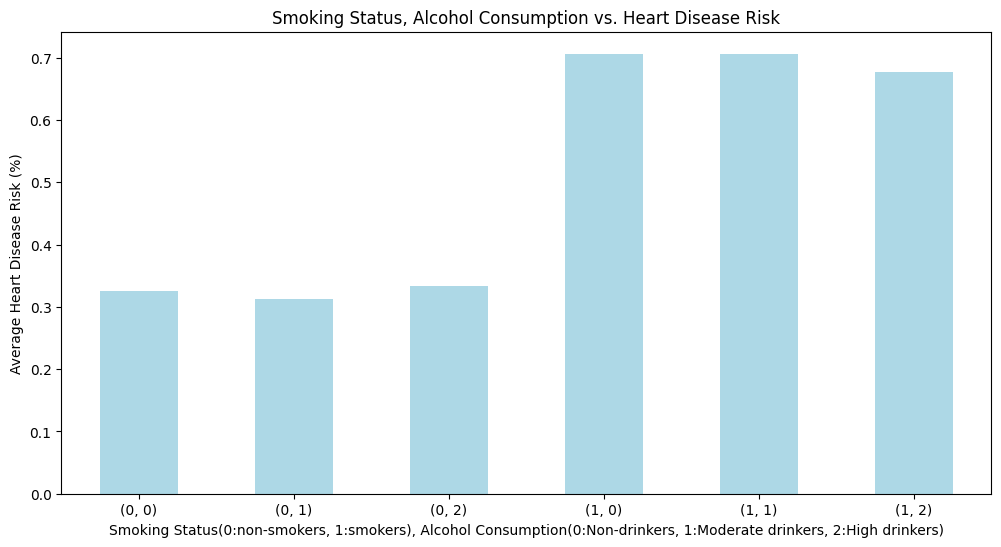

In [11]:
plt.figure(figsize=(12,6))
smoke_alcohol_risk.plot(kind='bar', color='lightblue', title="Smoking Status, Alcohol Consumption vs. Heart Disease Risk")
plt.xlabel("Smoking Status(0:non-smokers, 1:smokers), Alcohol Consumption(0:Non-drinkers, 1:Moderate drinkers, 2:High drinkers)")
plt.ylabel("Average Heart Disease Risk (%)")
plt.xticks(rotation=0)
plt.show()

In [3]:
blood_sugar_risk = df.groupby(['Heart_Disease_Risk'])['Fasting_Blood_Sugar'].mean()
blood_sugar_risk

Heart_Disease_Risk
0     97.534634
1    102.432722
Name: Fasting_Blood_Sugar, dtype: float64

The data indicates that higher physical activity level tend to have low heart disease risk.

In [4]:
activity_level_risk = df.groupby(['Heart_Disease_Risk'])['Physical_Activity_Level'].mean()
activity_level_risk

Heart_Disease_Risk
0    1.426832
1    1.131193
Name: Physical_Activity_Level, dtype: float64

<Axes: xlabel='Physical_Activity_Level', ylabel='Count'>

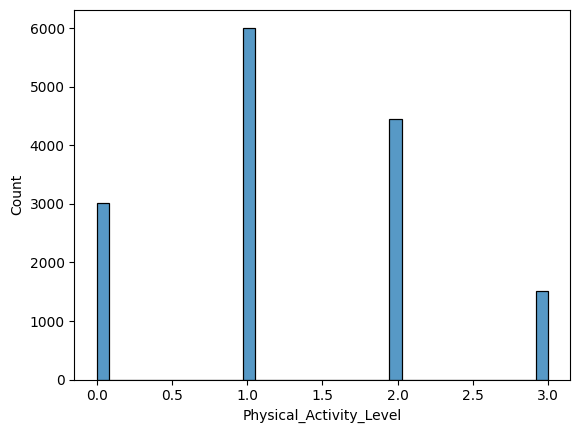

In [31]:
sns.histplot(df.Physical_Activity_Level)

In [25]:
act_group_risk = df.groupby(['Physical_Activity_Level'])['Heart_Disease_Risk'].mean()
act_group_risk

Physical_Activity_Level
0    0.558278
1    0.460143
2    0.366944
3    0.299736
Name: Heart_Disease_Risk, dtype: float64

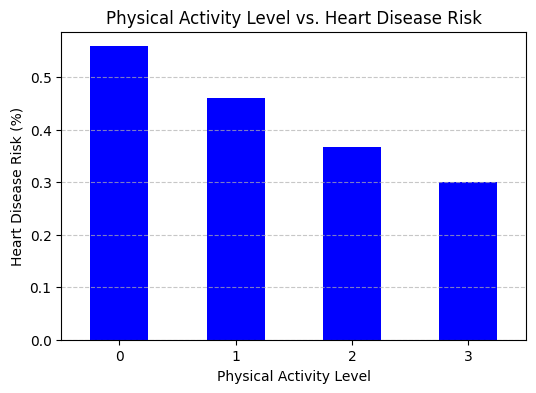

In [26]:
plt.figure(figsize=(6,4))
act_group_risk.plot(kind='bar', color='blue', title='Physical Activity Level vs. Heart Disease Risk')
plt.xlabel('Physical Activity Level')
plt.ylabel('Heart Disease Risk (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The data shows the family history plays a crucial role in heart disease risk.

In [5]:
family_history_risk = df.groupby(['Family_History'])['Heart_Disease_Risk'].mean()
family_history_risk

Family_History
0    0.394137
1    0.674097
Name: Heart_Disease_Risk, dtype: float64

In [7]:
sleep_hrs_risk = df.groupby('Sleep_Hours')['Heart_Disease_Risk'].mean()*100

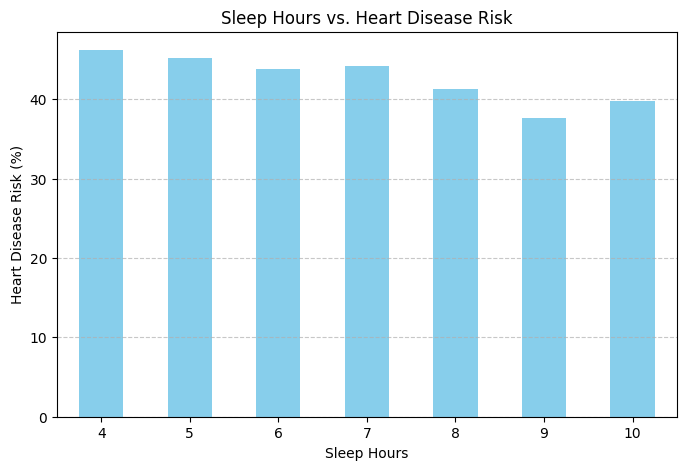

In [10]:
plt.figure(figsize=(8,5))
sleep_hrs_risk.plot(kind='bar', color='skyblue', title='Sleep Hours vs. Heart Disease Risk')
plt.xlabel('Sleep Hours')
plt.ylabel('Heart Disease Risk (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
# According to EDA, define meaningful features
features = ['Age', 'BMI', 'Systolic_BP', 'Diastolic_BP', 'Cholesterol_LDL',
            'Cholesterol_HDL', 'Smoking_Status', 'Physical_Activity_Level', 
            'Family_History', 'Stress_Level', 'Sleep_Hours']

X = df[features]
y = df['Heart_Disease_Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
rf_cls = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cls.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
y_pred = rf_cls.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.7196666666666667

In [20]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76      1694
           1       0.70      0.63      0.66      1306

    accuracy                           0.72      3000
   macro avg       0.72      0.71      0.71      3000
weighted avg       0.72      0.72      0.72      3000

